In [1]:
# important library:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [2]:
!pip install opendatasets

import opendatasets as od
od.download(
    "https://www.kaggle.com/datasets/subhamjain/loan-prediction-based-on-customer-behavior/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: yossefmohammed
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/subhamjain/loan-prediction-based-on-customer-behavior


100%|██████████| 5.15M/5.15M [00:00<00:00, 192MB/s]

# load the train data:

In [3]:
loan =pd.read_csv("loan-prediction-based-on-customer-behavior/Training Data.csv")
loan.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [4]:
loan.tail()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0
251999,252000,9070230,70,17,single,rented,no,Statistician,Avadi,Tamil_Nadu,7,11,0


- Drop unneeded columns:

In [5]:
loan.drop(columns=["Id","CITY"],inplace=True)
loan

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,single,rented,no,Surgeon,West_Bengal,6,11,0
251996,2843572,26,10,single,rented,no,Army_officer,Madhya_Pradesh,6,11,0
251997,4522448,46,7,single,rented,no,Design_Engineer,Maharashtra,7,12,0
251998,6507128,45,0,single,rented,no,Graphic_Designer,Puducherry,0,10,0


In [6]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Income             252000 non-null  int64 
 1   Age                252000 non-null  int64 
 2   Experience         252000 non-null  int64 
 3   Married/Single     252000 non-null  object
 4   House_Ownership    252000 non-null  object
 5   Car_Ownership      252000 non-null  object
 6   Profession         252000 non-null  object
 7   STATE              252000 non-null  object
 8   CURRENT_JOB_YRS    252000 non-null  int64 
 9   CURRENT_HOUSE_YRS  252000 non-null  int64 
 10  Risk_Flag          252000 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 21.1+ MB


In [7]:
loan.isnull().sum()

Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

- check the duplicates values

In [8]:
loan.duplicated().sum()

208810

- Show the stat table for the columns:

In [11]:
loan.describe()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


- EDA of the data:

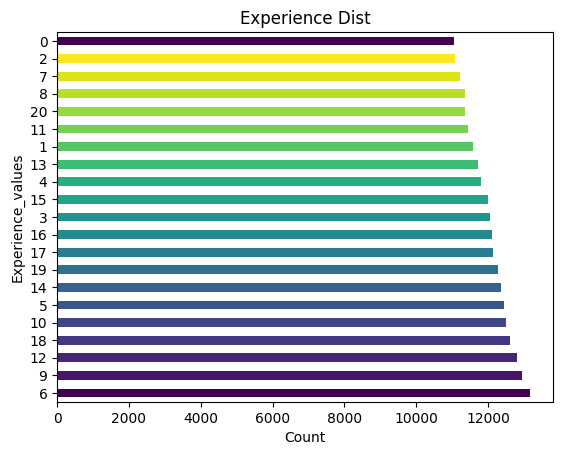

In [12]:
colors = plt.cm.viridis(np.linspace(0, 1, 20))
count=loan.Experience.value_counts().plot(kind='barh',color=colors)
plt.title('Experience Dist')
plt.xlabel('Count')
plt.ylabel('Experience_values')
plt.show()

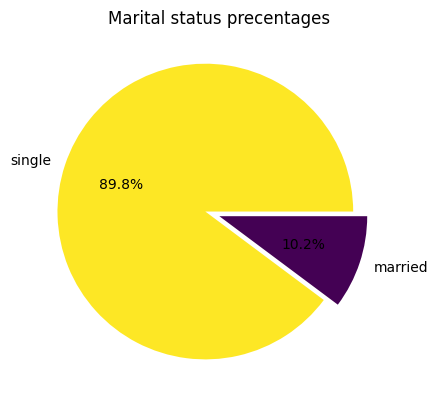

In [13]:
colors = plt.cm.viridis(np.linspace(1, 0, 2))
explode = (0.1, 0)
loan['Married/Single'].value_counts().plot(kind='pie',autopct='%1.1f%%',explode=explode,colors=colors)
plt.title('Marital status precentages')
plt.ylabel('')
plt.show()

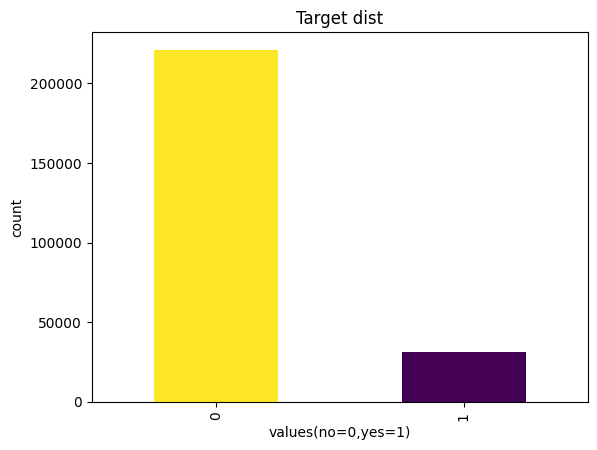

In [14]:
colors = plt.cm.viridis(np.linspace(1, 0, 2))
loan['Risk_Flag'].value_counts().plot(kind='bar',color=colors)
plt.title('Target dist')
plt.ylabel('count')
plt.xlabel('values(no=0,yes=1)')
plt.show()

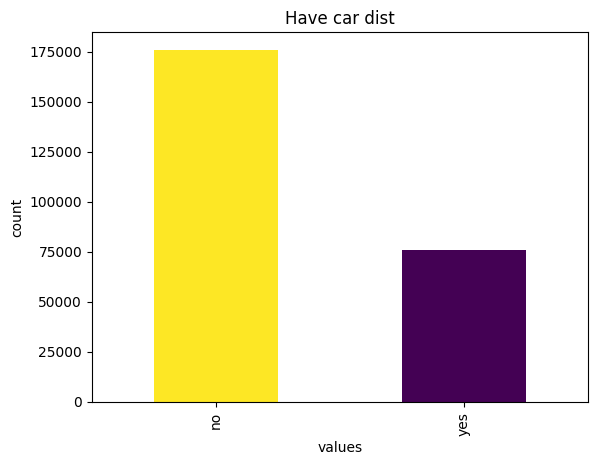

In [15]:
colors = plt.cm.viridis(np.linspace(1, 0, 2))
loan['Car_Ownership'].value_counts().plot(kind='bar',color=colors)
plt.title('Have car dist')
plt.ylabel('count')
plt.xlabel('values')
plt.show()

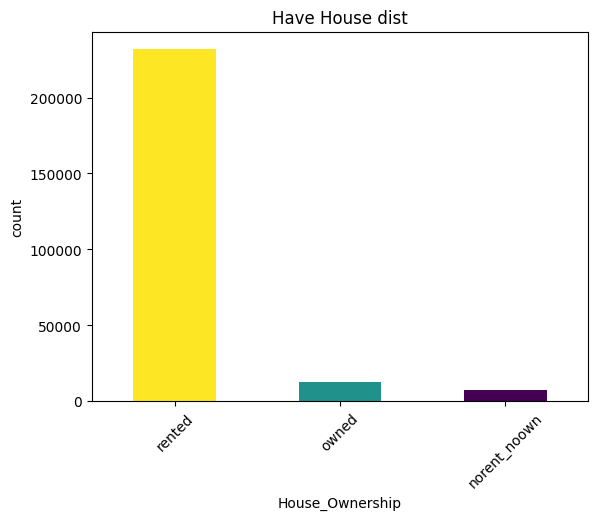

In [16]:
colors = plt.cm.viridis(np.linspace(1, 0, 3))
loan['House_Ownership'].value_counts().plot(kind='bar',color=colors)
plt.title('Have House dist')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.show()

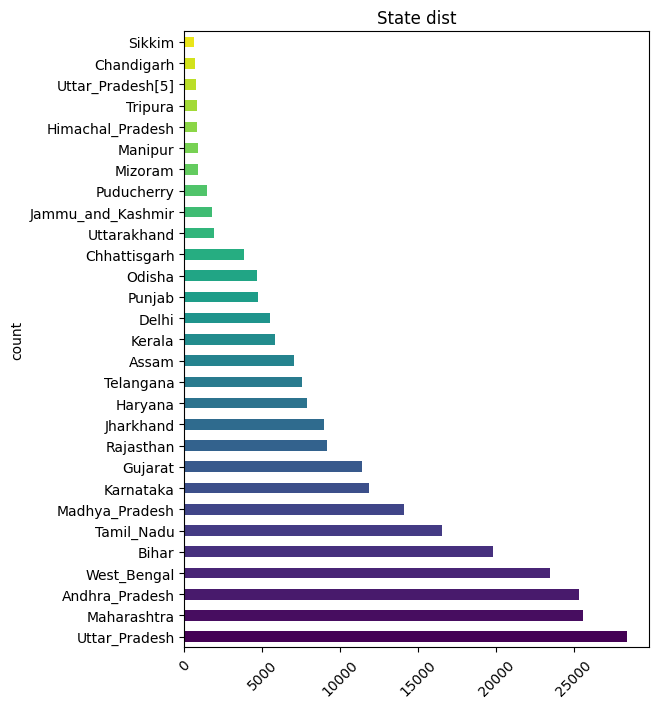

In [17]:
plt.figure(figsize=(6,8))
colors = plt.cm.viridis(np.linspace(0, 1, 30))
loan['STATE'].value_counts().plot(kind='barh',color=colors)
plt.title('State dist')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.show()

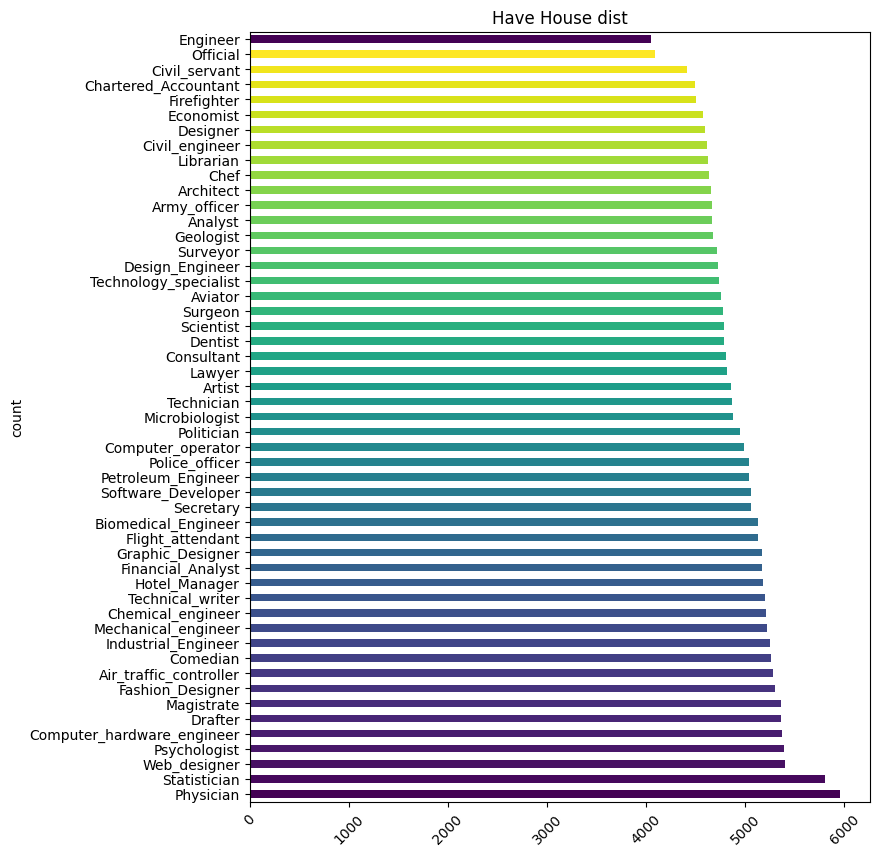

In [18]:
plt.figure(figsize=(8,10))
colors = plt.cm.viridis(np.linspace(0, 1, 50))
loan['Profession'].value_counts().plot(kind='barh',color=colors)
plt.title('Have House dist')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.show()

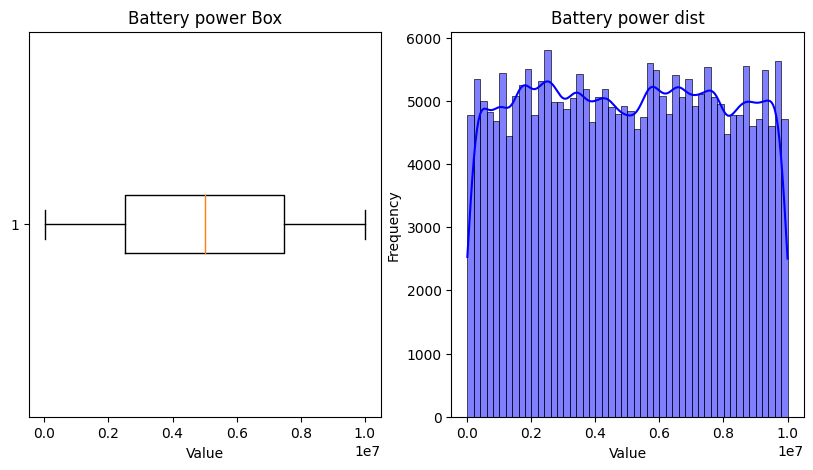

In [19]:
import seaborn as sns
fig, (ax_box, ax_hist) = plt.subplots(1, 2, figsize=(10, 5))

# Create boxplot
ax_box.boxplot(loan.Income, vert=False)
ax_box.set_xlabel('Value')
ax_box.set_title('Battery power Box')

sns.histplot(loan.Income, bins=50, color='blue', kde=True, ax=ax_hist)
ax_hist.set_xlabel('Value')
ax_hist.set_ylabel('Frequency')
ax_hist.set_title('Battery power dist')

# Show plot
plt.show()

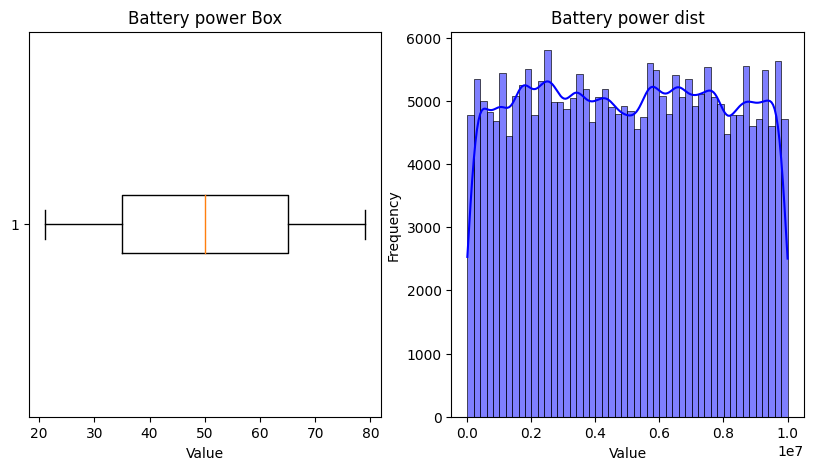

In [20]:
fig, (ax_box, ax_hist) = plt.subplots(1, 2, figsize=(10, 5))

# Create boxplot
ax_box.boxplot(loan.Age, vert=False)
ax_box.set_xlabel('Value')
ax_box.set_title('Battery power Box')

sns.histplot(loan.Income, bins=50, color='blue', kde=True, ax=ax_hist)
ax_hist.set_xlabel('Value')
ax_hist.set_ylabel('Frequency')
ax_hist.set_title('Battery power dist')

# Show plot
plt.show()

<Axes: xlabel='Car_Ownership'>

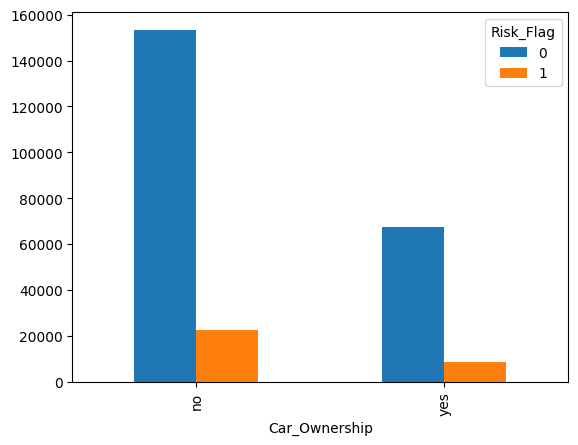

In [21]:
pd.crosstab(loan.Car_Ownership,loan.Risk_Flag).plot(kind='bar')

<Axes: xlabel='House_Ownership'>

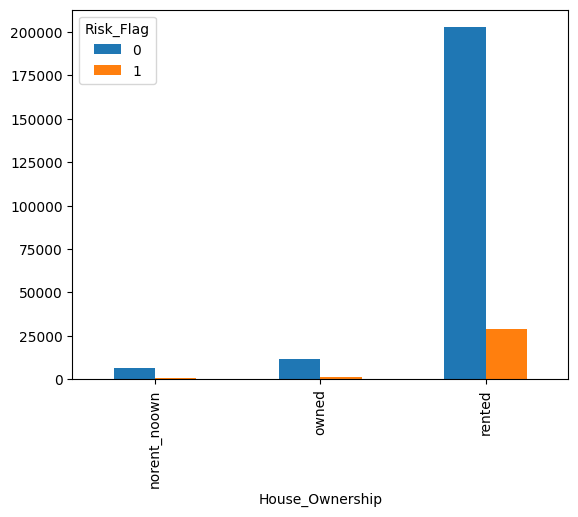

In [22]:
pd.crosstab(loan.House_Ownership,loan.Risk_Flag).plot(kind='bar')

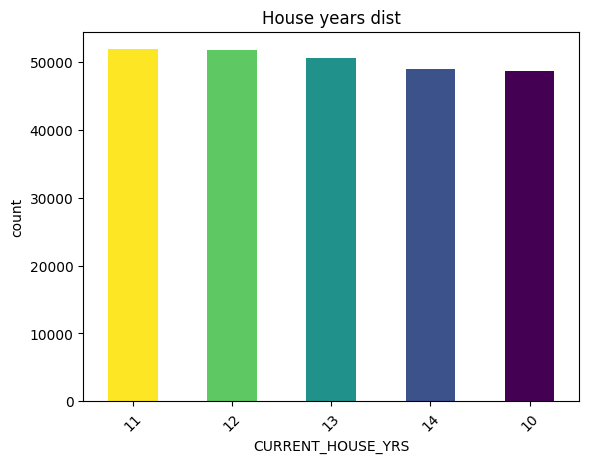

In [23]:
colors = plt.cm.viridis(np.linspace(1, 0, 5))
loan['CURRENT_HOUSE_YRS'].value_counts().plot(kind='bar',color=colors)
plt.title('House years dist')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.show()

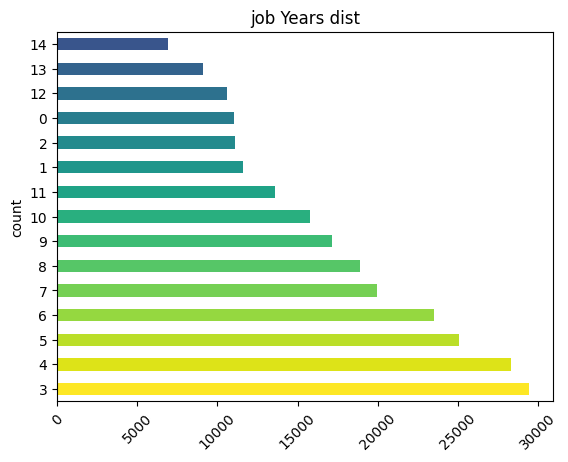

In [24]:
colors = plt.cm.viridis(np.linspace(1, 0, 20))
loan['CURRENT_JOB_YRS'].value_counts().plot(kind='barh',color=colors)
plt.title('job Years dist')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='CURRENT_JOB_YRS'>

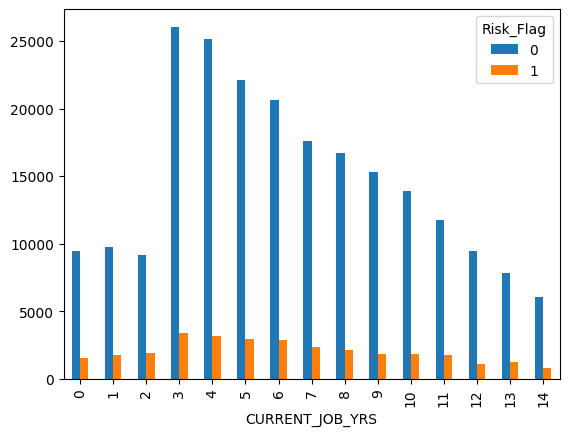

In [25]:
pd.crosstab(loan.CURRENT_JOB_YRS,loan.Risk_Flag).plot(kind='bar')

<Axes: xlabel='CURRENT_HOUSE_YRS'>

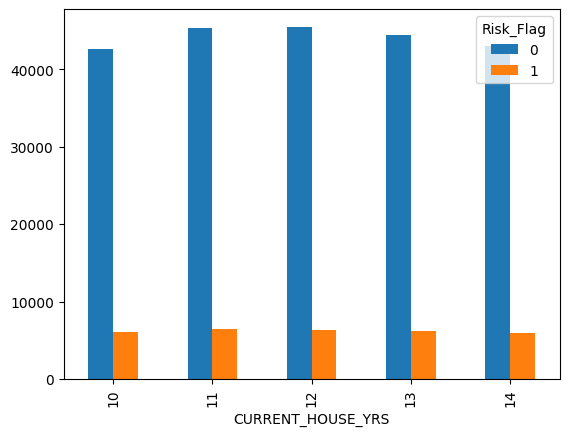

In [26]:
pd.crosstab(loan.CURRENT_HOUSE_YRS,loan.Risk_Flag).plot(kind='bar')

In [27]:
riskii=loan[['Income', 'Age', 'Experience', 'Married/Single', 'House_Ownership',"Car_Ownership",'Profession',"STATE",'Risk_Flag']]

# Modeling:

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
# Encode categorical variables
label_encoder = LabelEncoder()
for column in riskii.columns:
    if riskii[column].dtype == 'object':
        riskii[column] = label_encoder.fit_transform(riskii[column])

# Split the dataset into features and target variable
X = riskii.drop(columns=['Risk_Flag'])
y = riskii['Risk_Flag']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



<ipython-input-28-88930aca4a5b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  riskii[column] = label_encoder.fit_transform(riskii[column])
<ipython-input-28-88930aca4a5b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  riskii[column] = label_encoder.fit_transform(riskii[column])
<ipython-input-28-88930aca4a5b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [29]:
from keras.layers import BatchNormalization

# Define the model architecture with batch normalization
model = Sequential([
    Dense(8, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


Epoch 1/10
12600/12600 [==============================] - 53s 4ms/step - loss: 0.3824 - accuracy: 0.8701 - val_loss: 0.3727 - val_accuracy: 0.8759
Epoch 2/10
12600/12600 [==============================] - 31s 2ms/step - loss: 0.3701 - accuracy: 0.8773 - val_loss: 0.3721 - val_accuracy: 0.8759
Epoch 3/10
12600/12600 [==============================] - 36s 3ms/step - loss: 0.3696 - accuracy: 0.8773 - val_loss: 0.3720 - val_accuracy: 0.8759
Epoch 4/10
12600/12600 [==============================] - 32s 3ms/step - loss: 0.3694 - accuracy: 0.8773 - val_loss: 0.3716 - val_accuracy: 0.8759
Epoch 5/10
12600/12600 [==============================] - 33s 3ms/step - loss: 0.3693 - accuracy: 0.8773 - val_loss: 0.3710 - val_accuracy: 0.8759
Epoch 6/10
12600/12600 [==============================] - 47s 4ms/step - loss: 0.3694 - accuracy: 0.8773 - val_loss: 0.3715 - val_accuracy: 0.8759
Epoch 7/10
12600/12600 [==============================] - 34s 3ms/step - loss: 0.3692 - accuracy: 0.8773 - val_loss: 0

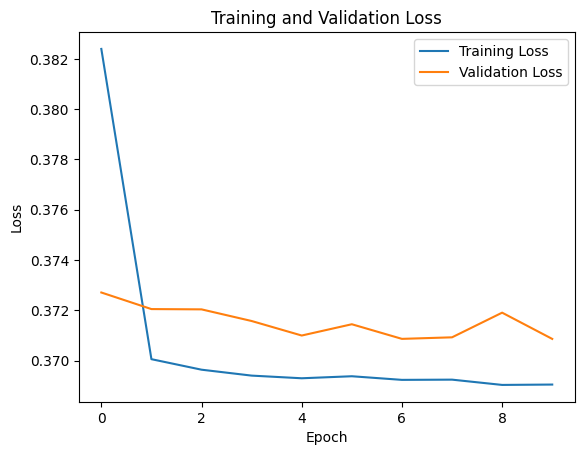

In [30]:
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=16, validation_data=(X_test_scaled, y_test))

# Get training and validation accuracy and loss
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']


# Plot training and validation loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [31]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {accuracy}')

1575/1575 [==============================] - 7s 4ms/step - loss: 0.3709 - accuracy: 0.8759
Test Accuracy: 0.875932514667511


1575/1575 [==============================] - 5s 3ms/step


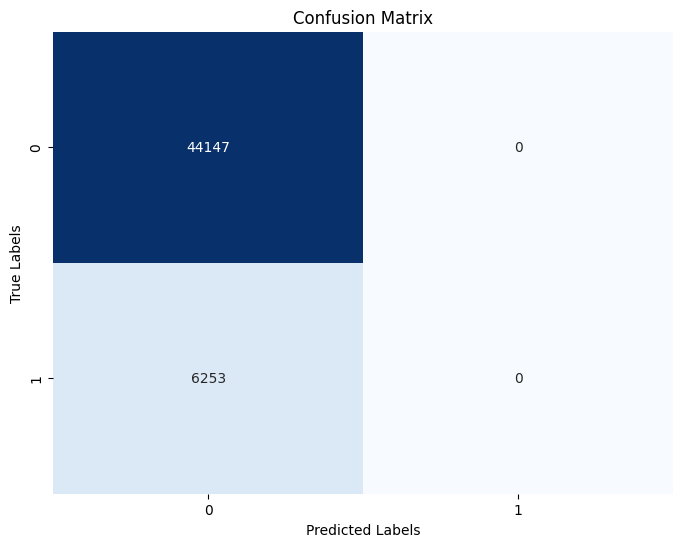

In [34]:
from sklearn.metrics import confusion_matrix
probabilities = model.predict(X_test_scaled)
predictions = (probabilities > 0.5).astype('int32')  # Convert probabilities to binary predictions

# Compute confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [35]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
test_data = pd.read_csv('loan-prediction-based-on-customer-behavior/Test Data.csv')
test_data.drop_duplicates(inplace=True)
test_data=test_data[['Income', 'Age', 'Experience', 'Married/Single', 'House_Ownership',"Car_Ownership",'Profession',"STATE"]]

label_encoders = {}

for column in test_data.columns:
    if test_data[column].dtype == 'object':
        label_encoders[column] = LabelEncoder()
        test_data[column] = label_encoders[column].fit_transform(test_data[column])

test_data_scaled = scaler.transform(test_data)

# Make predictions using the trained model
predictions = model.predict(test_data_scaled)

# Convert probabilities to binary predictions if needed
binary_predictions = (predictions > 0.5).astype('int32')

# Print predictions
print(binary_predictions)

875/875 [==============================] - 1s 2ms/step
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [36]:
model.save('loan_prediction_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
